<a href="https://colab.research.google.com/github/YL-chakradhar/Credit-card-Fraud-Detection/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32050 entries, 0 to 32049
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    32050 non-null  int64  
 1   V1      32050 non-null  float64
 2   V2      32050 non-null  float64
 3   V3      32050 non-null  float64
 4   V4      32050 non-null  float64
 5   V5      32050 non-null  float64
 6   V6      32050 non-null  float64
 7   V7      32050 non-null  float64
 8   V8      32050 non-null  float64
 9   V9      32050 non-null  float64
 10  V10     32050 non-null  float64
 11  V11     32050 non-null  float64
 12  V12     32050 non-null  float64
 13  V13     32050 non-null  float64
 14  V14     32050 non-null  float64
 15  V15     32050 non-null  float64
 16  V16     32050 non-null  float64
 17  V17     32049 non-null  float64
 18  V18     32049 non-null  float64
 19  V19     32049 non-null  float64
 20  V20     32049 non-null  float64
 21  V21     32049 non-null  float64
 22

In [ ]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data.loc[:, 'V13':'Class'])
data_imputed = imputer.transform(data.loc[:, 'V13':'Class'])
data.loc[:, 'V13':'Class'] = data_imputed

In [ ]:
data.isnull().values.any()

False

In [ ]:
Fraud = data[data['Class']==1]
Non_Fraud = data[data['Class']==0]

In [ ]:
print(Fraud.shape,Non_Fraud.shape)

(102, 31) (31948, 31)


In [ ]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape
print(data1.shape)
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

(3205, 31)


In [ ]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.003129890453834116
Fraud Cases : 10
Valid Cases : 3195


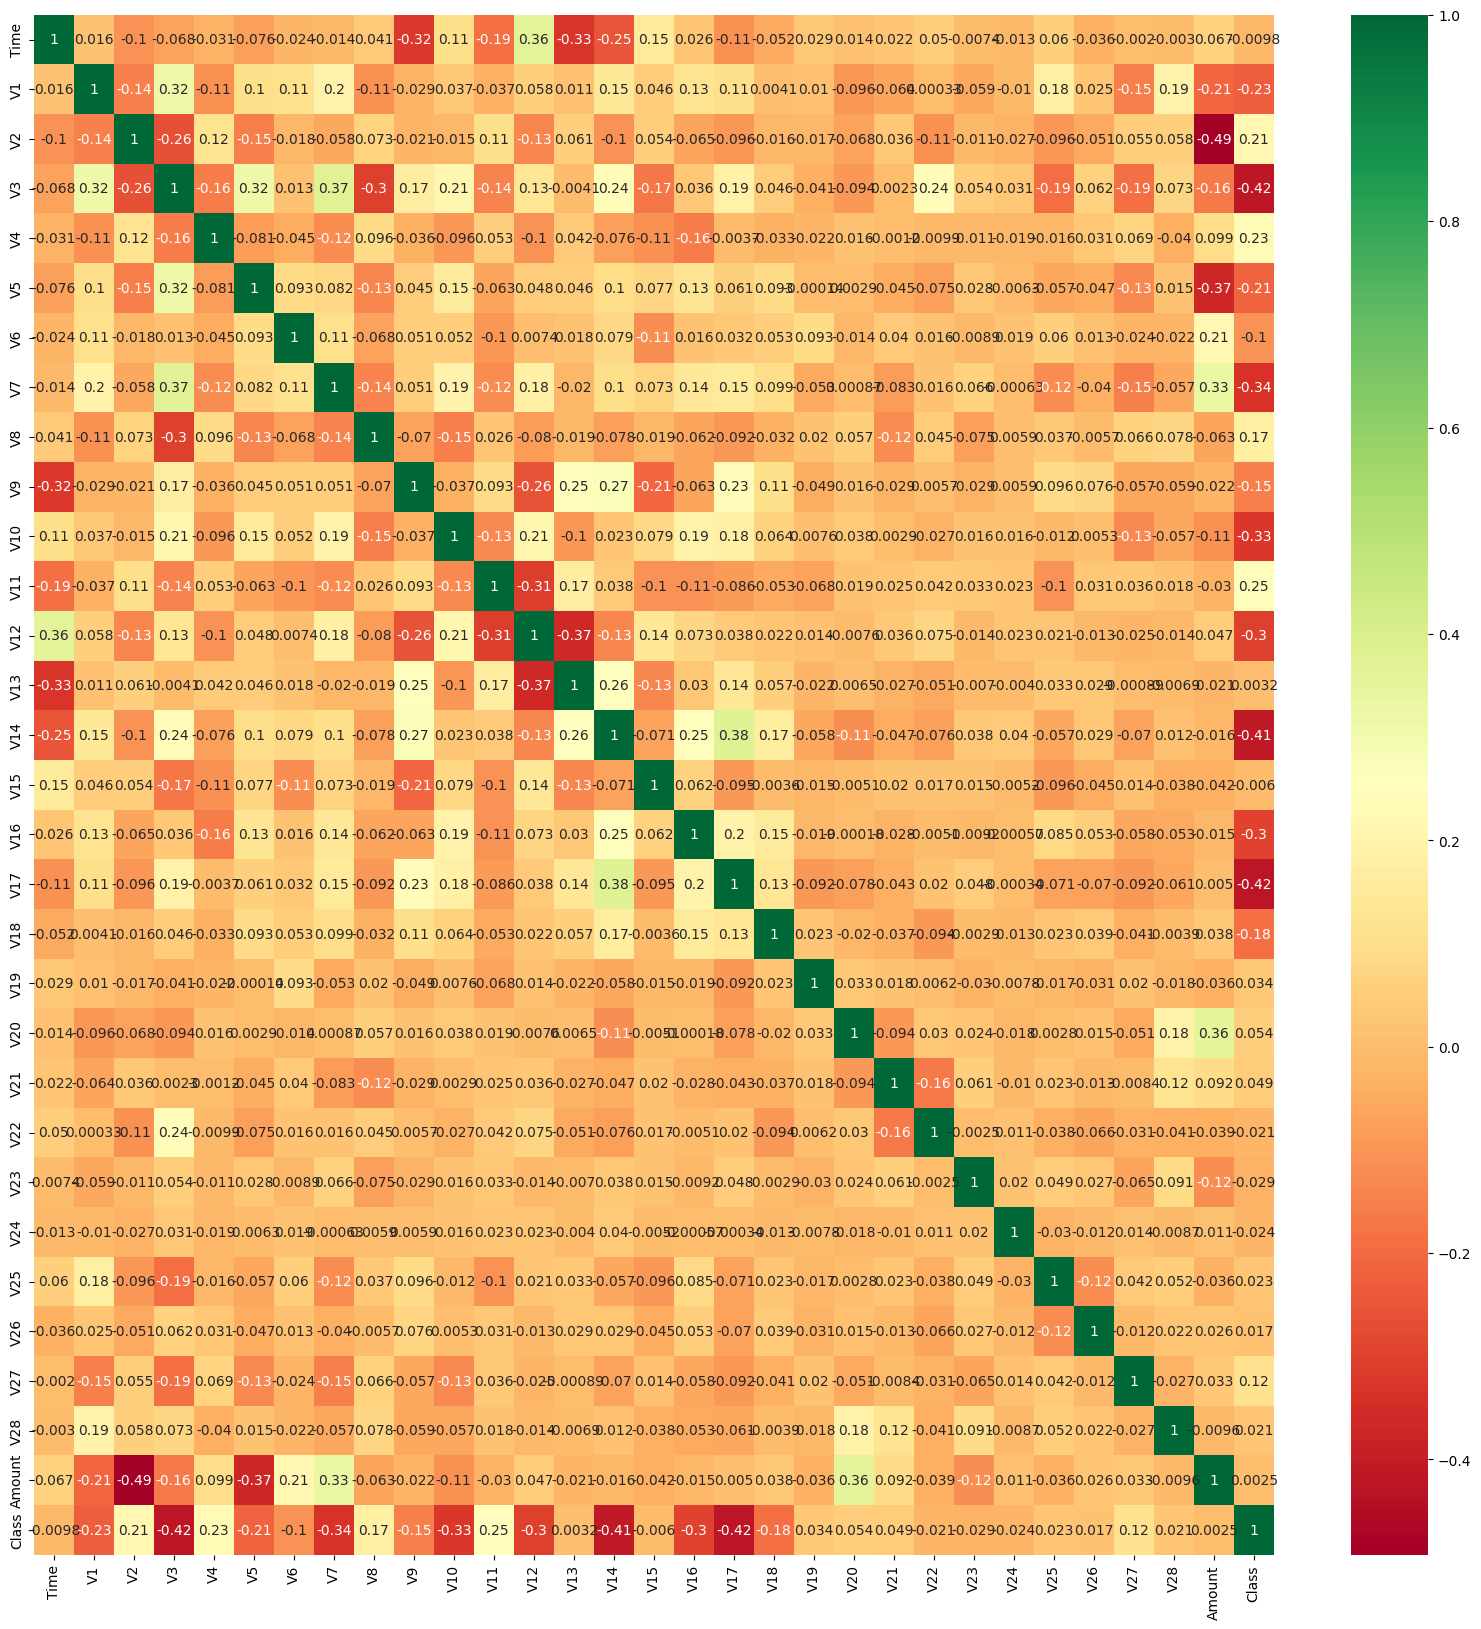

In [ ]:
## Correlation
import seaborn as sns
from matplotlib import pyplot as plt
#get correlations of each features in dataset
corrmat = data1.corr()#it gives the relationship between the columns
top_corr_features = corrmat.index#it mainly gives the relation ship between the rows
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [ ]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3205, 30)
(3205,)


In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)

}
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 7
Accuracy Score :
0.9978159126365055
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3195
         1.0       0.64      0.70      0.67        10

    accuracy                           1.00      3205
   macro avg       0.82      0.85      0.83      3205
weighted avg       1.00      1.00      1.00      3205

Local Outlier Factor: 21
Accuracy Score :
0.9934477379095163
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3195
         1.0       0.00      0.00      0.00        10

    accuracy                           0.99      3205
   macro avg       0.50      0.50      0.50      3205
weighted avg       0.99      0.99      0.99      3205

Support Vector Machine: 2022
Accuracy Score :
0.3691107644305772
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.37    